In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Campo Magnetico

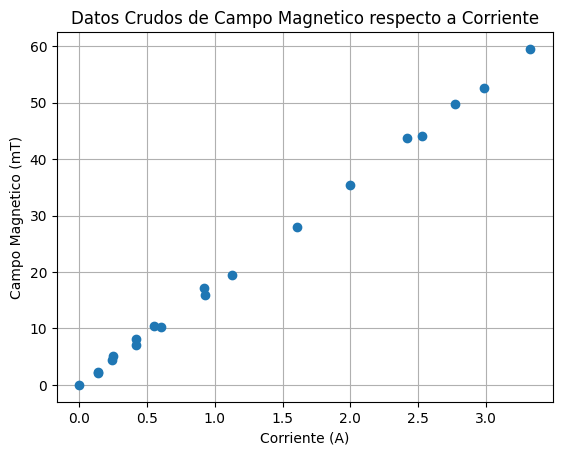

In [10]:
DATA_LOCATION = "./Clean/Campo/medidas.csv"
data = pd.read_csv(DATA_LOCATION).sort_values("Corriente(A)")
plt.plot(data["Corriente(A)"], data["Campo(mT)"], marker="o", linestyle='None')
plt.title('Datos Crudos de Campo Magnetico respecto a Corriente')
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnetico (mT)')
plt.grid(True)
plt.show()

In [3]:
m, b = np.polyfit(data["Corriente(A)"], data["Campo(mT)"], 1)
def prediction(x, m = m, b = b):
    return x*m + b

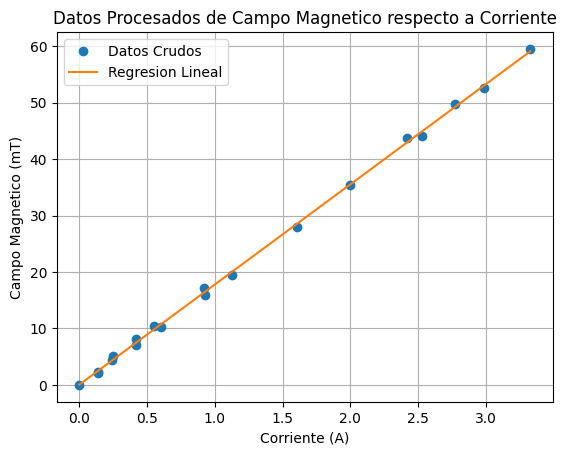

In [15]:
plt.plot(data["Corriente(A)"], data["Campo(mT)"], marker="o", linestyle='None', label="Datos Crudos")
plt.plot(data["Corriente(A)"], prediction(data["Corriente(A)"]), label="Regresion Lineal")
plt.title('Datos Procesados de Campo Magnetico respecto a Corriente')
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def delta(N, longitud_onda = 633):
    return (N * longitud_onda)/ 2

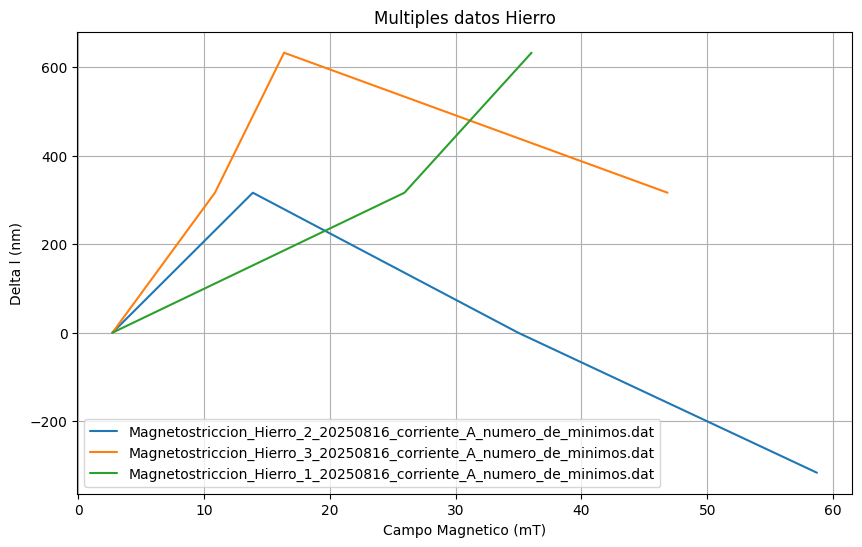

In [16]:
archivos = [x for x in os.listdir("Clean/Hierro") if "Hierro_4" not in x]

plt.figure(figsize=(10, 6))

# 3. Iterar sobre cada archivo y graficar sus datos
for archivo in archivos:
    df = pd.read_csv(f"Clean/Hierro/{archivo}").sort_values('corriente_A')
    df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
    plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label=archivo.split('/')[-1], solid_capstyle='round')

# 4. Añadir etiquetas y leyenda
plt.title('Multiples datos Hierro')
plt.ylabel('Delta l (nm)')
plt.xlabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.show()

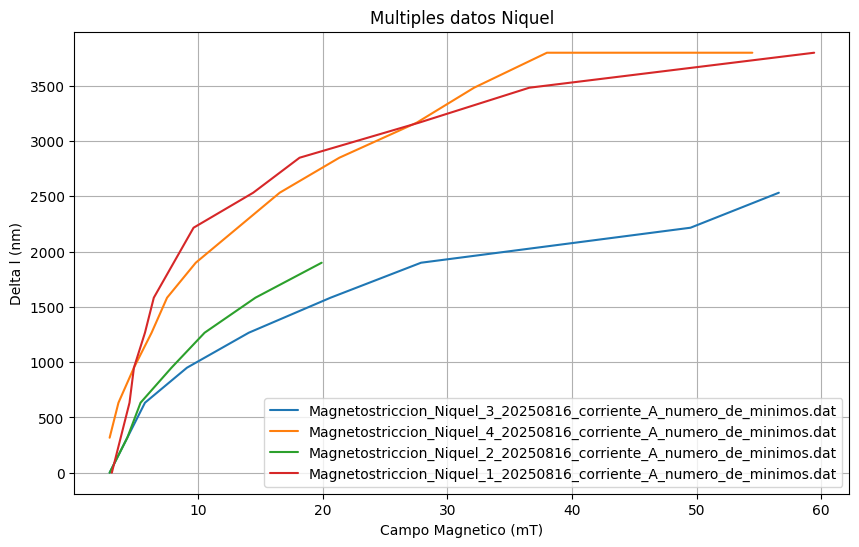

In [7]:
archivos = os.listdir("Clean/Niquel")

plt.figure(figsize=(10, 6))

# 3. Iterar sobre cada archivo y graficar sus datos
for archivo in archivos:
    df = pd.read_csv(f"Clean/Niquel/{archivo}").sort_values('corriente_A')
    df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
    plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label=archivo.split('/')[-1], solid_capstyle='round')

# 4. Añadir etiquetas y leyenda
plt.title('Multiples datos Niquel')
plt.ylabel('Delta l (nm)')
plt.xlabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.show()